# 2016-2017 NYC Real Estate Sales Exploration

## by Tatiana Tikhonova

## Preliminary Wrangling

[This dataset](https://www.kaggle.com/new-york-city/nyc-property-sales) consists of information regarding properties sold in New York City over a 12-month period from September 2016 to September 2017. It contains the location, address, type, sale price, and sale date of building units sold. 

**Data Wrangling** steps performed:


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'


In [2]:
df = pd.read_csv('/Users/tatianatikhonova/Documents/udacity/Project4/RealEstateSales/ToGit/Kaggle NYC 2016-17 real estate sales.csv')

In [3]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Unnamed: 22,\n,Unnamed: 24,Unnamed: 25
0,19129,4,OZONE PARK,05 TAX CLASS 1 VACANT LAND,1B,11531,50,,V0,****** 95TH STREET,,11417,0,0,0,2330,-,0,1,V0,-,12/28/16 0:00,NaN,NaN,NaN,NaN
1,14507,3,GOWANUS,22 STORE BUILDINGS,4,1007,172,,K6,1 12TH ST EXTENSION,,11215,0,6,6,86250,108625,1968,4,K6,0,10/6/16 0:00,NaN,NaN,NaN,NaN
2,3675,1,GREENWICH VILLAGE-CENTRAL,10 COOPS - ELEVATOR APARTMENTS,2,550,22,,D4,1 5 AVENUE,,10003,0,0,0,-,-,1927,2,D4,4925000,8/17/17 0:00,NaN,NaN,NaN,NaN
3,3673,1,GREENWICH VILLAGE-CENTRAL,10 COOPS - ELEVATOR APARTMENTS,2,550,22,,D4,"1 5TH AVENUE, 23A",,10003,0,0,0,-,-,1927,2,D4,-,5/19/17 0:00,NaN,NaN,NaN,NaN
4,11516,4,FOREST HILLS,10 COOPS - ELEVATOR APARTMENTS,2,3276,24,,D4,"1 ASCAN AVE, 35",,11375,0,0,0,-,-,1918,2,D4,649000,1/11/17 0:00,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            84548 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       84548 non-null  object 
 8   BUILDING CLASS AT PRESENT       84548 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                84548 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

In [5]:
dfc = df.copy()
dfc = dfc.drop(['\n', 'Unnamed: 22', 'Unnamed: 24','Unnamed: 25','Unnamed: 0'], axis=1)

In [6]:
dfc.sample()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
70330,4,REGO PARK,10 COOPS - ELEVATOR APARTMENTS,2,3164,12,,D4,"67-30 CLYDE STREET, 6T",,11375,0,0,0,-,-,1953,2,D4,-,12/28/16 0:00


In [7]:
dfc['SALE DATE'] = pd.to_datetime(df['SALE DATE']) 
dfc.columns = map(lambda x: x.title(), dfc.columns)
dfc.sample()

,Borough,Neighborhood,Building Class Category,Tax Class At Present,Block,Lot,Ease-Ment,Building Class At Present,Address,Apartment Number,Zip Code,Residential Units,Commercial Units,Total Units,Land Square Feet,Gross Square Feet,Year Built,Tax Class At Time Of Sale,Building Class At Time Of Sale,Sale Price,Sale Date
47890,1,MIDTOWN WEST,13 CONDOS - ELEVATOR APARTMENTS,2,1272,1013,,R4,33 WEST 56TH STREET,6A,10019,1,0,1,-,-,2007,2,R4,2200000,2017-06-06


In [8]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Borough                         84548 non-null  int64         
 1   Neighborhood                    84548 non-null  object        
 2   Building Class Category         84548 non-null  object        
 3   Tax Class At Present            84548 non-null  object        
 4   Block                           84548 non-null  int64         
 5   Lot                             84548 non-null  int64         
 6   Ease-Ment                       84548 non-null  object        
 7   Building Class At Present       84548 non-null  object        
 8   Address                         84548 non-null  object        
 9   Apartment Number                84548 non-null  object        
 10  Zip Code                        84548 non-null  int64         
 11  Re

In [9]:
dfc["Borough"] = dfc["Borough"].map({1: "Manhattan", 2: "Bronx",3:"Brooklyn",4:"Queens",5:"Staten Island"})


In [10]:
dfc[dfc["Sale Price"] == " -  "].Lot.count()

14561

In [11]:
n = dfc[dfc["Sale Price"] != " -  "]
n.sort_values("Sale Price", inplace=True, ascending=False)
n.tail()

,Borough,Neighborhood,Building Class Category,Tax Class At Present,Block,Lot,Ease-Ment,Building Class At Present,Address,Apartment Number,Zip Code,Residential Units,Commercial Units,Total Units,Land Square Feet,Gross Square Feet,Year Built,Tax Class At Time Of Sale,Building Class At Time Of Sale,Sale Price,Sale Date
74262,Brooklyn,OCEAN PARKWAY-NORTH,10 COOPS - ELEVATOR APARTMENTS,2,6494,51,,D4,"763 OCEAN PARKWAY, 4H",,11230,0,0,0,0,0,1937,2,D4,0,2016-12-01
41693,Brooklyn,BEDFORD STUYVESANT,16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT,2C,1789,1001,,R8,277 NOSTRAND AVE,C1,11216,0,1,1,0,0,2005,2,R8,0,2017-03-30
41692,Brooklyn,EAST NEW YORK,05 TAX CLASS 1 VACANT LAND,1B,4245,5,,V0,277 MILFORD STREET,,11208,0,0,0,2000,0,0,1,V0,0,2016-10-06
74266,Brooklyn,SUNSET PARK,02 TWO FAMILY DWELLINGS,1,732,35,,B9,764 43RD STREET,,11232,2,0,2,2003,2128,1920,1,B9,0,2017-06-22
1,Brooklyn,GOWANUS,22 STORE BUILDINGS,4,1007,172,,K6,1 12TH ST EXTENSION,,11215,0,6,6,86250,108625,1968,4,K6,0,2016-10-06


In [12]:
n['Sale Price'] = n['Sale Price'].astype(int)
n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69987 entries, 22404 to 1
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Borough                         69987 non-null  object        
 1   Neighborhood                    69987 non-null  object        
 2   Building Class Category         69987 non-null  object        
 3   Tax Class At Present            69987 non-null  object        
 4   Block                           69987 non-null  int64         
 5   Lot                             69987 non-null  int64         
 6   Ease-Ment                       69987 non-null  object        
 7   Building Class At Present       69987 non-null  object        
 8   Address                         69987 non-null  object        
 9   Apartment Number                69987 non-null  object        
 10  Zip Code                        69987 non-null  int64         
 11  Re

In [13]:
n[n["Sale Price"] > 10].Lot.count()

58852

In [14]:
n[n["Sale Price"] > 150000].Lot.count
n = n[n["Sale Price"] > 150000]
n.Lot.count()

55663

In [15]:
(round((n.Lot.count() / df.LOT.count()),2)*100).astype(str) + "%"
#how many rows left of the original data set after removing rows that are missing Sale Price 
#or have an unreasonable cost lower than 150K.

'66.0%'

In [16]:
n = n.applymap(lambda s:s.title() if type(s) == str else s)
n.head(2)

,Borough,Neighborhood,Building Class Category,Tax Class At Present,Block,Lot,Ease-Ment,Building Class At Present,Address,Apartment Number,Zip Code,Residential Units,Commercial Units,Total Units,Land Square Feet,Gross Square Feet,Year Built,Tax Class At Time Of Sale,Building Class At Time Of Sale,Sale Price,Sale Date
22404,Manhattan,Greenwich Village-Central,01 One Family Dwellings,1,525,34,,S1,168 Thompson Street,,10012,1,1,2,1350,5807,1900,1,S1,9999999,2016-11-22
75117,Manhattan,Greenwich Village-Central,10 Coops - Elevator Apartments,2,576,1,,D4,"79 West 12Th Street, 7E",,10011,0,0,0,-,-,1960,2,D4,999999,2017-04-20


In [17]:
#The sum of all areas on all floors of a building included within the outside faces of its
#exterior walls, including all vertical penetration areas for circulation and shaft areas that
#connect one floor to another

n[n["Gross Square Feet"] == " -  "].Lot.count()

20545

In [18]:
#another df, m, for analyzing trends using Sq. Ft. values
m = n[n["Gross Square Feet"] != " -  "]
m["Gross Square Feet"] = m["Gross Square Feet"].astype(int)

m = m[m["Gross Square Feet"] > 0]

m.sort_values("Gross Square Feet", inplace=True, ascending=False)

m.tail()

,Borough,Neighborhood,Building Class Category,Tax Class At Present,Block,Lot,Ease-Ment,Building Class At Present,Address,Apartment Number,Zip Code,Residential Units,Commercial Units,Total Units,Land Square Feet,Gross Square Feet,Year Built,Tax Class At Time Of Sale,Building Class At Time Of Sale,Sale Price,Sale Date
65534,Queens,Maspeth,41 Tax Class 4 - Other,4,2774,52,,Z9,57-02 Brown Place,,11378,0,1,1,1313,200,1960,4,Z9,152500,2016-11-03
24017,Queens,Ridgewood,41 Tax Class 4 - Other,4,3377,1,,Z9,175 Woodward Avenue,,11385,0,1,1,4500,200,1931,4,Z9,950000,2017-01-27
72576,Brooklyn,Kensington,41 Tax Class 4 - Other,4,5322,51,,Z9,72 Caton Place,,11218,0,0,0,21992,200,1931,4,Z9,15194971,2017-04-05
12006,Brooklyn,Borough Park,06 Tax Class 1 - Other,1,5747,23,,G0,1332 64Th Street,,11219,1,0,1,2017,150,1930,1,G0,560000,2017-06-19
11992,Bronx,Hunts Point,41 Tax Class 4 - Other,4,2775,53,,Z9,1330 East Bay Avenue,,10474,0,1,1,9400,120,1931,4,Z9,500000,2017-04-13


In [19]:
m['units'] = m['Commercial Units'] + m['Residential Units']

In [20]:
m.sample()

,Borough,Neighborhood,Building Class Category,Tax Class At Present,Block,Lot,Ease-Ment,Building Class At Present,Address,Apartment Number,Zip Code,Residential Units,Commercial Units,Total Units,Land Square Feet,Gross Square Feet,Year Built,Tax Class At Time Of Sale,Building Class At Time Of Sale,Sale Price,Sale Date,units
75007,Brooklyn,Flatbush-East,02 Two Family Dwellings,1,5000,43,,B3,786 East 37Th Street,,11210,2,0,2,1600,1520,1940,1,B3,265000,2016-12-20,2


In [21]:
m.query('units<1').Lot.count()

31

In [22]:
k = m[m['units']>0]

In [23]:
(round((k.Lot.count() / df.LOT.count()),2)*100).astype(str) + "%" #df w/o missing sq ft

'33.0%'

In [24]:
k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27621 entries, 40724 to 11992
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Borough                         27621 non-null  object        
 1   Neighborhood                    27621 non-null  object        
 2   Building Class Category         27621 non-null  object        
 3   Tax Class At Present            27621 non-null  object        
 4   Block                           27621 non-null  int64         
 5   Lot                             27621 non-null  int64         
 6   Ease-Ment                       27621 non-null  object        
 7   Building Class At Present       27621 non-null  object        
 8   Address                         27621 non-null  object        
 9   Apartment Number                27621 non-null  object        
 10  Zip Code                        27621 non-null  int64         
 11

In [25]:
k['Tax Class At Present'].unique()

array(['2', '4', '2B', '2A', '1'], dtype=object)

In [26]:
k['Building Class Category'].unique() 

array(['10 Coops - Elevator Apartments             ',
       '21 Office Buildings                        ',
       '08 Rentals - Elevator Apartments           ',
       '22 Store Buildings                         ',
       '27 Factories                               ',
       '32 Hospital And Health Facilities          ',
       '25 Luxury Hotels                           ',
       '26 Other Hotels                            ',
       '29 Commercial Garages                      ',
       '07 Rentals - Walkup Apartments             ',
       '37 Religious Facilities                    ',
       '30 Warehouses                              ',
       '23 Loft Buildings                          ',
       '11A Condo-Rentals                           ',
       '38 Asylums And Homes                       ',
       '09 Coops - Walkup Apartments               ',
       '33 Educational Facilities                  ',
       '40 Selected Governmental Facilities        ',
       '34 Theatres        

In [27]:
k.describe()

,Block,Lot,Zip Code,Residential Units,Commercial Units,Total Units,Gross Square Feet,Year Built,Tax Class At Time Of Sale,Sale Price,units
count,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,2.762100e+04,27621.000000,27621.000000,2.762100e+04,27621.000000
mean,5559.133485,61.780059,10995.391477,3.010825,0.336918,3.346258,4.310501e+03,1940.104413,1.223815,1.737799e+06,3.347743
std,3757.706918,118.185293,514.614146,19.993612,14.443072,24.799189,3.379841e+04,46.410955,0.677142,1.751162e+07,24.799529
min,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.200000e+02,0.000000,1.000000,1.505000e+05,1.000000
25%,2719.000000,19.000000,10462.000000,1.000000,0.000000,1.000000,1.362000e+03,1920.000000,1.000000,4.500000e+05,1.000000
50%,4949.000000,38.000000,11221.000000,2.000000,0.000000,2.000000,1.872000e+03,1930.000000,1.000000,6.499990e+05,2.000000
75%,7823.000000,64.000000,11373.000000,2.000000,0.000000,2.000000,2.660000e+03,1960.000000,1.000000,9.800000e+05,2.000000
max,16319.000000,3710.000000,11694.000000,1844.000000,2261.000000,2261.000000,3.750565e+06,2017.000000,4.000000,2.210000e+09,2261.000000


In [28]:
k.rename(columns={'Building Class Category':'Class'}, inplace=True)

In [29]:
k.head()

,Borough,Neighborhood,Class,Tax Class At Present,Block,Lot,Ease-Ment,Building Class At Present,Address,Apartment Number,Zip Code,Residential Units,Commercial Units,Total Units,Land Square Feet,Gross Square Feet,Year Built,Tax Class At Time Of Sale,Building Class At Time Of Sale,Sale Price,Sale Date,units
40724,Queens,Glen Oaks,10 Coops - Elevator Apartments,2,8489,1,,D4,26910 Grand Central Parkwa,,11005,1844,22,1866,4228300,3750565,1972,2,D4,525000,2017-07-05,1866
66933,Manhattan,Financial,21 Office Buildings,4,40,3,,O4,60 Wall Street,,10005,0,1,1,53632,1617206,1987,4,O4,1040000000,2017-01-24,1
37467,Manhattan,Midtown Cbd,21 Office Buildings,4,1301,1,,O4,245 Park Avenue,,10167,0,35,35,81336,1586886,1966,4,O4,2210000000,2017-05-05,35
73966,Bronx,Soundview,08 Rentals - Elevator Apartments,2,3600,4,,D7,755 White Plains Road,,10473,948,7,955,679000,1021752,1977,2,D7,70936348,2017-06-30,955
77565,Manhattan,Financial,21 Office Buildings,4,29,1,,O4,85 Broad Street,,10004,0,1,1,42762,993569,1983,4,O4,652000000,2017-05-24,1


In [30]:
k.Class.unique()

array(['10 Coops - Elevator Apartments             ',
       '21 Office Buildings                        ',
       '08 Rentals - Elevator Apartments           ',
       '22 Store Buildings                         ',
       '27 Factories                               ',
       '32 Hospital And Health Facilities          ',
       '25 Luxury Hotels                           ',
       '26 Other Hotels                            ',
       '29 Commercial Garages                      ',
       '07 Rentals - Walkup Apartments             ',
       '37 Religious Facilities                    ',
       '30 Warehouses                              ',
       '23 Loft Buildings                          ',
       '11A Condo-Rentals                           ',
       '38 Asylums And Homes                       ',
       '09 Coops - Walkup Apartments               ',
       '33 Educational Facilities                  ',
       '40 Selected Governmental Facilities        ',
       '34 Theatres        

In [31]:
k['Class'] = k['Class'].str.lstrip('0123456789 ')

In [32]:
k.Class.unique()

array(['Coops - Elevator Apartments             ',
       'Office Buildings                        ',
       'Rentals - Elevator Apartments           ',
       'Store Buildings                         ',
       'Factories                               ',
       'Hospital And Health Facilities          ',
       'Luxury Hotels                           ',
       'Other Hotels                            ',
       'Commercial Garages                      ',
       'Rentals - Walkup Apartments             ',
       'Religious Facilities                    ',
       'Warehouses                              ',
       'Loft Buildings                          ',
       'A Condo-Rentals                           ',
       'Asylums And Homes                       ',
       'Coops - Walkup Apartments               ',
       'Educational Facilities                  ',
       'Selected Governmental Facilities        ',
       'Theatres                                ',
       'Indoor Public And Cul

In [33]:
k['Class'] = k['Class'].str.rstrip()

In [34]:
k.Class.unique()

array(['Coops - Elevator Apartments', 'Office Buildings',
       'Rentals - Elevator Apartments', 'Store Buildings', 'Factories',
       'Hospital And Health Facilities', 'Luxury Hotels', 'Other Hotels',
       'Commercial Garages', 'Rentals - Walkup Apartments',
       'Religious Facilities', 'Warehouses', 'Loft Buildings',
       'A Condo-Rentals', 'Asylums And Homes',
       'Coops - Walkup Apartments', 'Educational Facilities',
       'Selected Governmental Facilities', 'Theatres',
       'Indoor Public And Cultural Facilities', 'Condo Coops',
       'Outdoor Recreational Facilities', 'Tax Class 4 - Other',
       'Rentals - 4-10 Unit', 'One Family Dwellings',
       'Three Family Dwellings', 'Two Family Dwellings',
       'Tax Class 1 Vacant Land', 'Commercial Vacant Land',
       'Tax Class 1 - Other'], dtype=object)

In [35]:
#dropping Total Units which doesn't always accurately summarize units, 
#so we replaced it with a calculated Units columns.

k.drop(['Total Units'], axis=1, inplace=True)

In [36]:
k[k['Year Built']==0].Lot.count()
#need to drop those 9 rows

9

In [37]:
k = k[k['Year Built']!=0]

In [38]:
k.to_csv('wrangled_sales.csv', index=False)

### What is the structure of your dataset?

We are looking at 27.5K real estate sales (33% of the population) that took place in NYC and were completed over a 12-month period from September 2016 to September 2017.

Each observation is a sale spread over a number of variables, among which are: Borough, Neighborhood, # of units, price, square footage.

### What is/are the main feature(s) of interest in your dataset?

I would like to understand pricing trends.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect both location and size (unit count and sq footage) have a large impact on pricing. It would be interesting to see if building class affects the cost, and if so, to what degree.


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

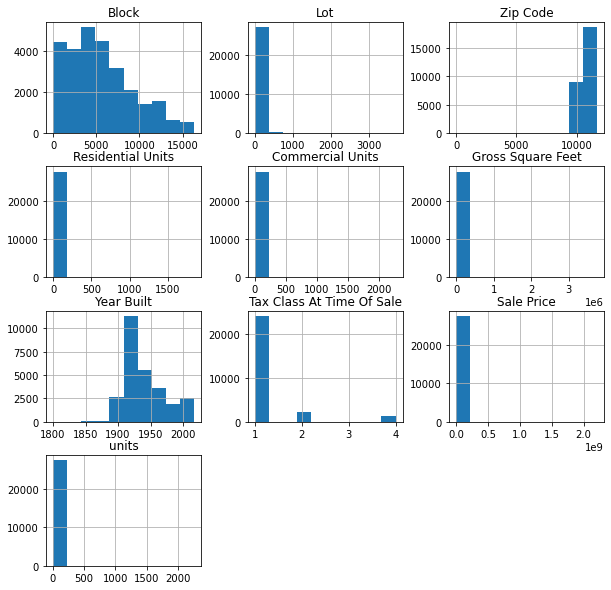

In [39]:
k.hist(figsize=(10,10));

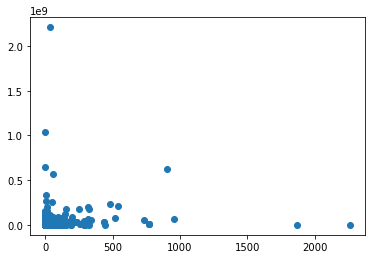

In [40]:
plt.scatter(k.units,k['Sale Price'])
plt.show()

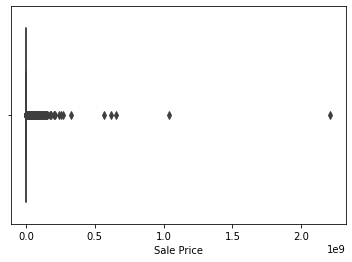

In [41]:
#checking for outliers
sns.boxplot(x=k['Sale Price']);

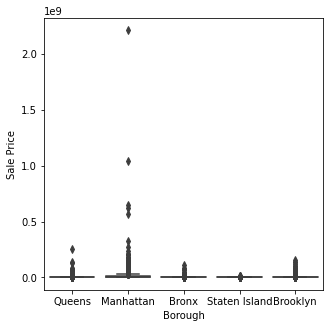

In [42]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Borough',y='Sale Price', data = k);

**Looks like several outliers that we have belong to sales made in Manhattan, it's best to remove them so they don't skew the calculations.**

In [43]:
k[(k["Sale Price"] > 1000000000)]

,Borough,Neighborhood,Class,Tax Class At Present,Block,Lot,Ease-Ment,Building Class At Present,Address,Apartment Number,Zip Code,Residential Units,Commercial Units,Land Square Feet,Gross Square Feet,Year Built,Tax Class At Time Of Sale,Building Class At Time Of Sale,Sale Price,Sale Date,units
66933,Manhattan,Financial,Office Buildings,4,40,3,,O4,60 Wall Street,,10005,0,1,53632,1617206,1987,4,O4,1040000000,2017-01-24,1
37467,Manhattan,Midtown Cbd,Office Buildings,4,1301,1,,O4,245 Park Avenue,,10167,0,35,81336,1586886,1966,4,O4,2210000000,2017-05-05,35


In [44]:
k=k[(k["Sale Price"] < 1000000000)]

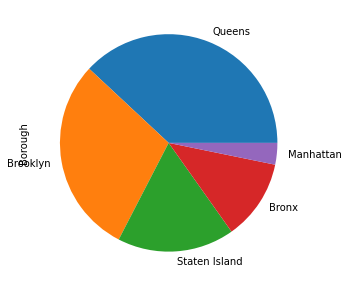

In [45]:
k['Borough'].value_counts().plot(kind='pie', figsize=(5,5));

**It looks like Queens is leading as far as number of sales goes, with Brooklyn closely following. It'd be interesting to see if the positions remain the same when we plot by avg. amount of deal made aka Sale Price, which we will explore in our Bivariate analysis.**

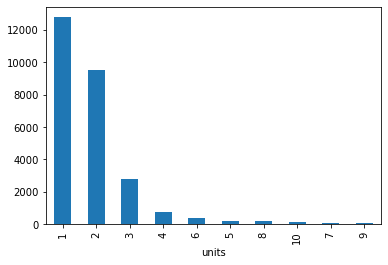

In [46]:
k.groupby('units').size().sort_values(ascending=False)[:10].plot.bar();

**Looks like most sales were made on properties that have under 10 units. I wonder if the majority of sales recorded in that period belong to apartments or rather commercial buildings, single-family homes, and the like. Let's check and see the sales quantity of each class:**

In [47]:
k.query('units<10').Class.unique().tolist()

['Office Buildings',
 'Hospital And Health Facilities',
 'Other Hotels',
 'Store Buildings',
 'Commercial Garages',
 'Religious Facilities',
 'Warehouses',
 'Loft Buildings',
 'Luxury Hotels',
 'Factories',
 'Educational Facilities',
 'Asylums And Homes',
 'Selected Governmental Facilities',
 'Theatres',
 'Indoor Public And Cultural Facilities',
 'Outdoor Recreational Facilities',
 'Tax Class 4 - Other',
 'Rentals - Elevator Apartments',
 'Rentals - Walkup Apartments',
 'Rentals - 4-10 Unit',
 'One Family Dwellings',
 'Three Family Dwellings',
 'Two Family Dwellings',
 'Tax Class 1 Vacant Land',
 'Commercial Vacant Land',
 'Tax Class 1 - Other']

In [48]:
k.query('units<10')['Tax Class At Time Of Sale'].unique().tolist()

[4, 2, 1]

In [49]:
k[k['Tax Class At Time Of Sale'] ==2].Class.unique().tolist()

['Coops - Elevator Apartments',
 'Rentals - Elevator Apartments',
 'Rentals - Walkup Apartments',
 'A Condo-Rentals',
 'Coops - Walkup Apartments',
 'Rentals - 4-10 Unit']

In [50]:
k[k['Tax Class At Time Of Sale'] !=2].Class.unique().tolist()

['Office Buildings',
 'Store Buildings',
 'Factories',
 'Hospital And Health Facilities',
 'Luxury Hotels',
 'Other Hotels',
 'Commercial Garages',
 'Religious Facilities',
 'Warehouses',
 'Loft Buildings',
 'Asylums And Homes',
 'Educational Facilities',
 'Selected Governmental Facilities',
 'Theatres',
 'Indoor Public And Cultural Facilities',
 'Outdoor Recreational Facilities',
 'Tax Class 4 - Other',
 'One Family Dwellings',
 'Three Family Dwellings',
 'Two Family Dwellings',
 'Tax Class 1 Vacant Land',
 'Commercial Vacant Land',
 'Tax Class 1 - Other']

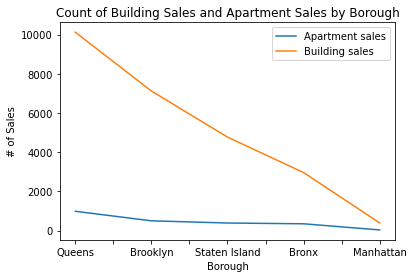

In [51]:
p1 = k[k['Tax Class At Time Of Sale'] ==2].Borough.value_counts().plot(kind='line');
p2 = k[k['Tax Class At Time Of Sale'] !=2].Borough.value_counts().plot(kind='line');
plt.title('Count of Building Sales and Apartment Sales by Borough')
plt.xlabel('Borough')
plt.ylabel('# of Sales')
plt.legend(['Apartment sales','Building sales']);

#• Class 1: Includes most residential property of up to three units (such as one-,
#two-, and three-family homes and small stores or offices with one or two
#attached apartments), vacant land that is zoned for residential use, and most
#condominiums that are not more than three stories.
#• Class 2: Includes all other property that is primarily residential, such as
#cooperatives and condominiums.
#Class 4: Includes all other properties not included in class 1,2, and 3, such as
#offices, factories, warehouses, garage buildings, etc. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>  It was interesting to observe that building sales comprise the majority of the dataset, as shown in the above plot.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I came across a couple outliers when looking at the Sale Price by Borough. I decided to remove them so they don't skew the calculations.

## Bivariate Exploration

Our first step would be to check for correlations by building a correlation plot.

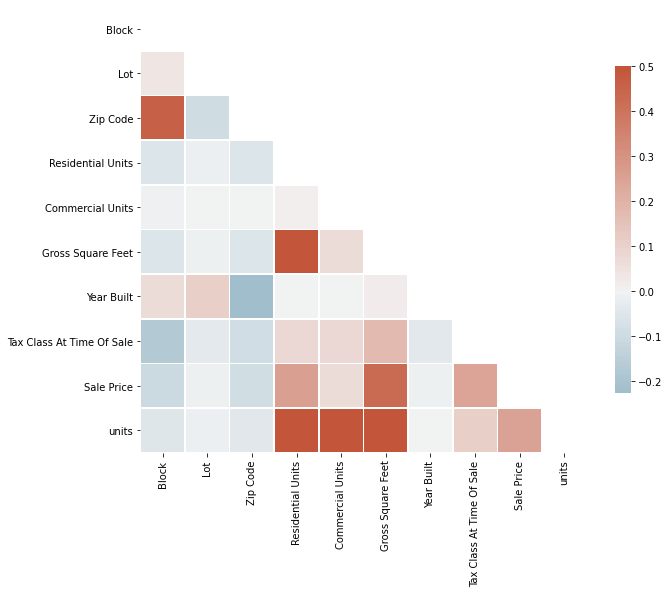

In [52]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Compute the correlation matrix
corr = k.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .6});

We set the max correlation coefficient to 0.3 to make any potential correlations more prominent (as opposed to setting it to 1, which results in the plot with barely visible correlations). We can observe correlations between **Sale Price and Gross Sq Ft, Unit, and Tax Class**. I'm certain there is one between **Sale Price and Borough**, too.

I'm also seeing a correlation I wouldn't think of: **Lot (aka building location) and Year Built**. Let's look into this a bit closer:

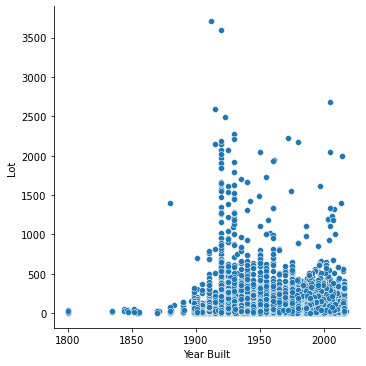

In [53]:
sns.relplot(x="Year Built", y="Lot", data=k);


From the [NY Glossary of Terms](https://www1.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf), we know that a Tax Lot is a subdivision of a Tax Block and represents the **property unique location**. And while this correlation is not something I would easily think of, it makes perfect sense: they say, Rome wasn't built in one day -- the same goes for New York City. It took time, and it's only natural that some lots and blocks were developed in one time period, with others preceding or following.

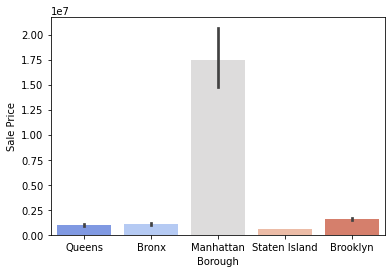

In [54]:
ax = sns.barplot(x="Borough", 
y='Sale Price', 
data=k, 
palette=sns.color_palette('coolwarm', n_colors=5))
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 10,5

**As expected, deals made on Manhattan apartments are quite expensive. While having the least number of sales as compared to other boroughs, Manhattan leads with its apartment costs. It would be interesting to see average price per unit by Borough.**

In [55]:
avg_by_borough = round(k.groupby('Borough').mean(),2)
avg_by_borough

,Block,Lot,Zip Code,Residential Units,Commercial Units,Gross Square Feet,Year Built,Tax Class At Time Of Sale,Sale Price,units
Borough,,,,,,,,,,
Bronx,4135.75,79.71,10458.19,4.20,0.20,5417.83,1939.43,1.28,1083040.28,4.40
Brooklyn,4780.87,53.23,11218.97,2.71,0.19,3755.32,1928.87,1.28,1600826.34,2.91
Manhattan,1334.25,56.19,10029.95,19.86,2.30,28177.22,1916.78,2.22,17412974.70,22.16
Queens,7960.37,53.77,11389.93,2.22,0.43,3005.36,1939.71,1.14,954914.77,2.65
Staten Island,3387.15,82.24,10303.78,1.30,0.10,2255.60,1968.31,1.07,553139.33,1.40


In [56]:
avg_price_per_unit = avg_by_borough['Sale Price'] / avg_by_borough['units']

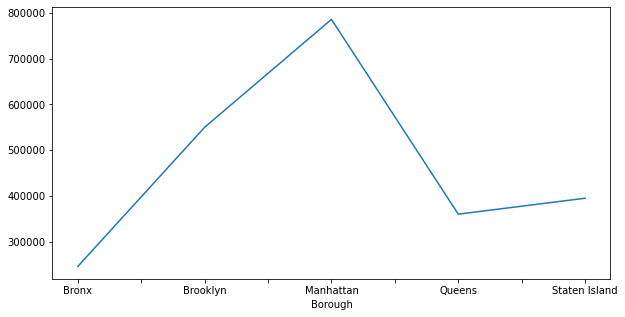

In [57]:
avg_price_per_unit.plot(kind='line');

**Looks like Manhattan average_per_unit comes close to a million. What of building class, which class is most expensive?**

In [58]:
avg_by_class = k.groupby('Class',as_index=False).mean()
avg_by_class.sort_values("Sale Price",ascending=False, inplace=True)

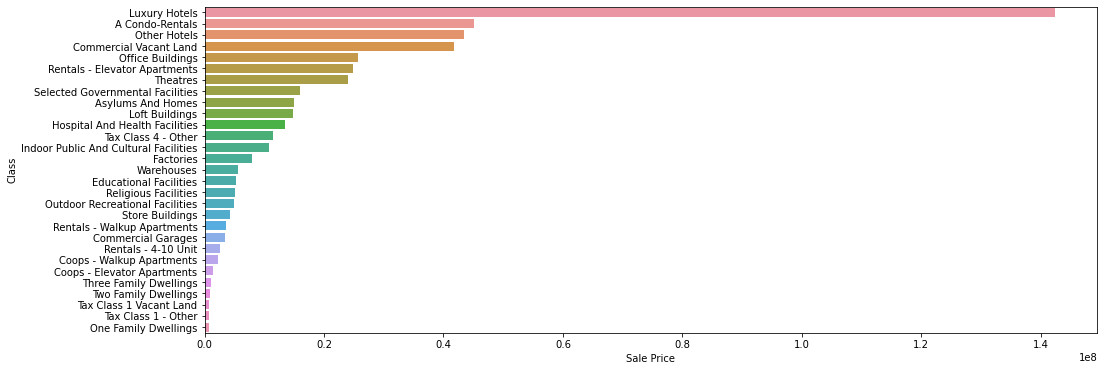

In [59]:
plt.figure(figsize=(16,6))
byclass = sns.barplot(x='Sale Price',y='Class',data=avg_by_class,orient='h');

**Very interesting. It appears, Luxury Hotels and Condo-Rentals cost more than the rest, folled by commercial vacant land, office buildings, with condo-coops and rentals to follow. What if we zoom in to apartment sales only, which should be [Tax Class 2 Sales](https://www1.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf)**

Checking my logic: below are tax classes for BUILDING sales:

In [60]:
k[k['Residential Units']==1]['Tax Class At Time Of Sale'].unique()

array([4, 1])

Checking my logic: below are residential unit classes for Tax Class 2, which appear to fit the bill:

In [61]:
k[k['Tax Class At Time Of Sale']==2].Class.unique()

array(['Coops - Elevator Apartments', 'Rentals - Elevator Apartments',
       'Rentals - Walkup Apartments', 'A Condo-Rentals',
       'Coops - Walkup Apartments', 'Rentals - 4-10 Unit'], dtype=object)

In [62]:
avg_apt_by_class = avg_by_class[avg_by_class['Tax Class At Time Of Sale']==2]

Replotting for apartment sales only:

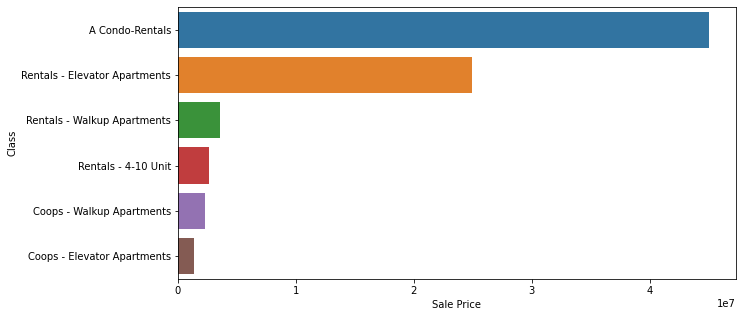

In [63]:
byclass = sns.barplot(x='Sale Price',y='Class',data=avg_apt_by_class,orient='h');

**Now we see that in the world of apartments, Condo-Rentals' average price far outweights the rest.**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

It was unusual to see Hotels being most expensive sales in New York City. When cosidering property sales, I didn't even think of them, and it prompted me to separate building and apartment sales so I can zoom in on the latter to see where things are at with residential units.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes! I observed a correlation I wouldn't think of: **Lot (aka building location) and Year Built**. From the [NY Glossary of Terms](https://www1.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf), we know that a Tax Lot is a subdivision of a Tax Block and represents the **property unique location**. And while this correlation is not something I would easily think of, it makes perfect sense: they say, Rome wasn't built in one day -- the same goes for New York City. It took time, and it's only natural that some lots and block were developed in one time period, with others preceding or following. 

## Multivariate Exploration

It my multivariate exploration, I'd like to look closer at the relationship between Tax Class, Borough, Sale Price, Year Built, and Size (Units or Sq Footage).

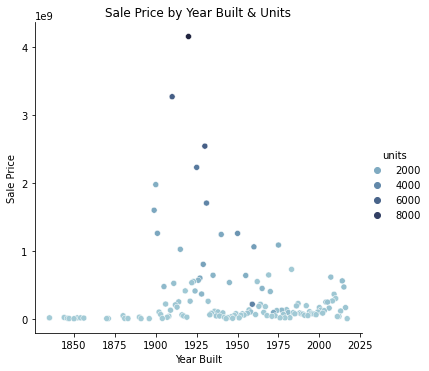

In [64]:
grouped_by_year = k.groupby('Year Built', as_index=False).sum().sort_values(by='Sale Price',ascending=False)
grouped_by_year = grouped_by_year[grouped_by_year['Year Built']>1800]

v1 = sns.relplot(x="Year Built", y="Sale Price", hue="units",
            data=grouped_by_year, palette="ch:r=-.2,l=.75",sizes='Year Built');
v1.ax.set_title("Sale Price by Year Built & Units");

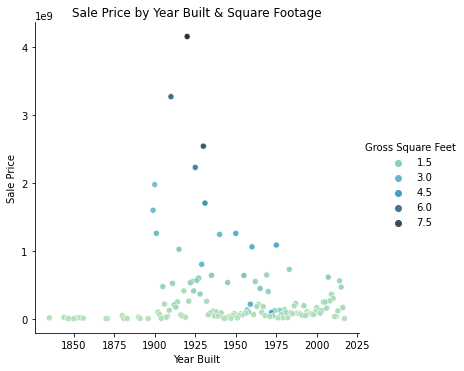

In [65]:
grouped_by_year = k.groupby('Year Built', as_index=False).sum().sort_values(by='Sale Price',ascending=False)
grouped_by_year = grouped_by_year[grouped_by_year['Year Built']>1800]

sns.relplot(x="Year Built", y="Sale Price", hue="Gross Square Feet",
            data=grouped_by_year, palette="GnBu_d",sizes='Year Built');
plt.title("Sale Price by Year Built & Square Footage");

It seems that in the majority of cases, the most expensive sales involved the largest number of units with the highest square footage, which makes perfect sense. Surprisingly, more modern does not necessarily mean more expensive as far as property sales go. We can see that the most expensive sales involved properties built between 1900 and 1975. 

Would be interesting to see by Borough:

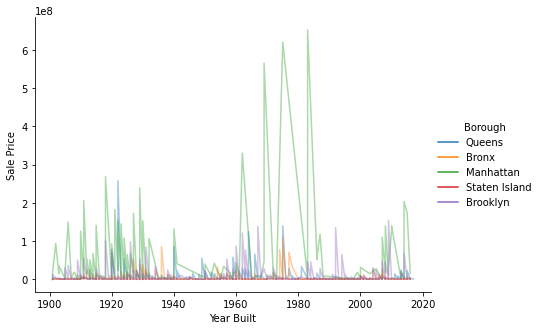

In [74]:
sns.relplot(x="Year Built", y="Sale Price", hue="Borough",
            kind="line", estimator=None, data=k[(k['Year Built']>1900) & (k['Sale Price'] !=0)],
            sizes='Year Built',
            height=4.5,aspect=6/4.5,alpha=0.4);

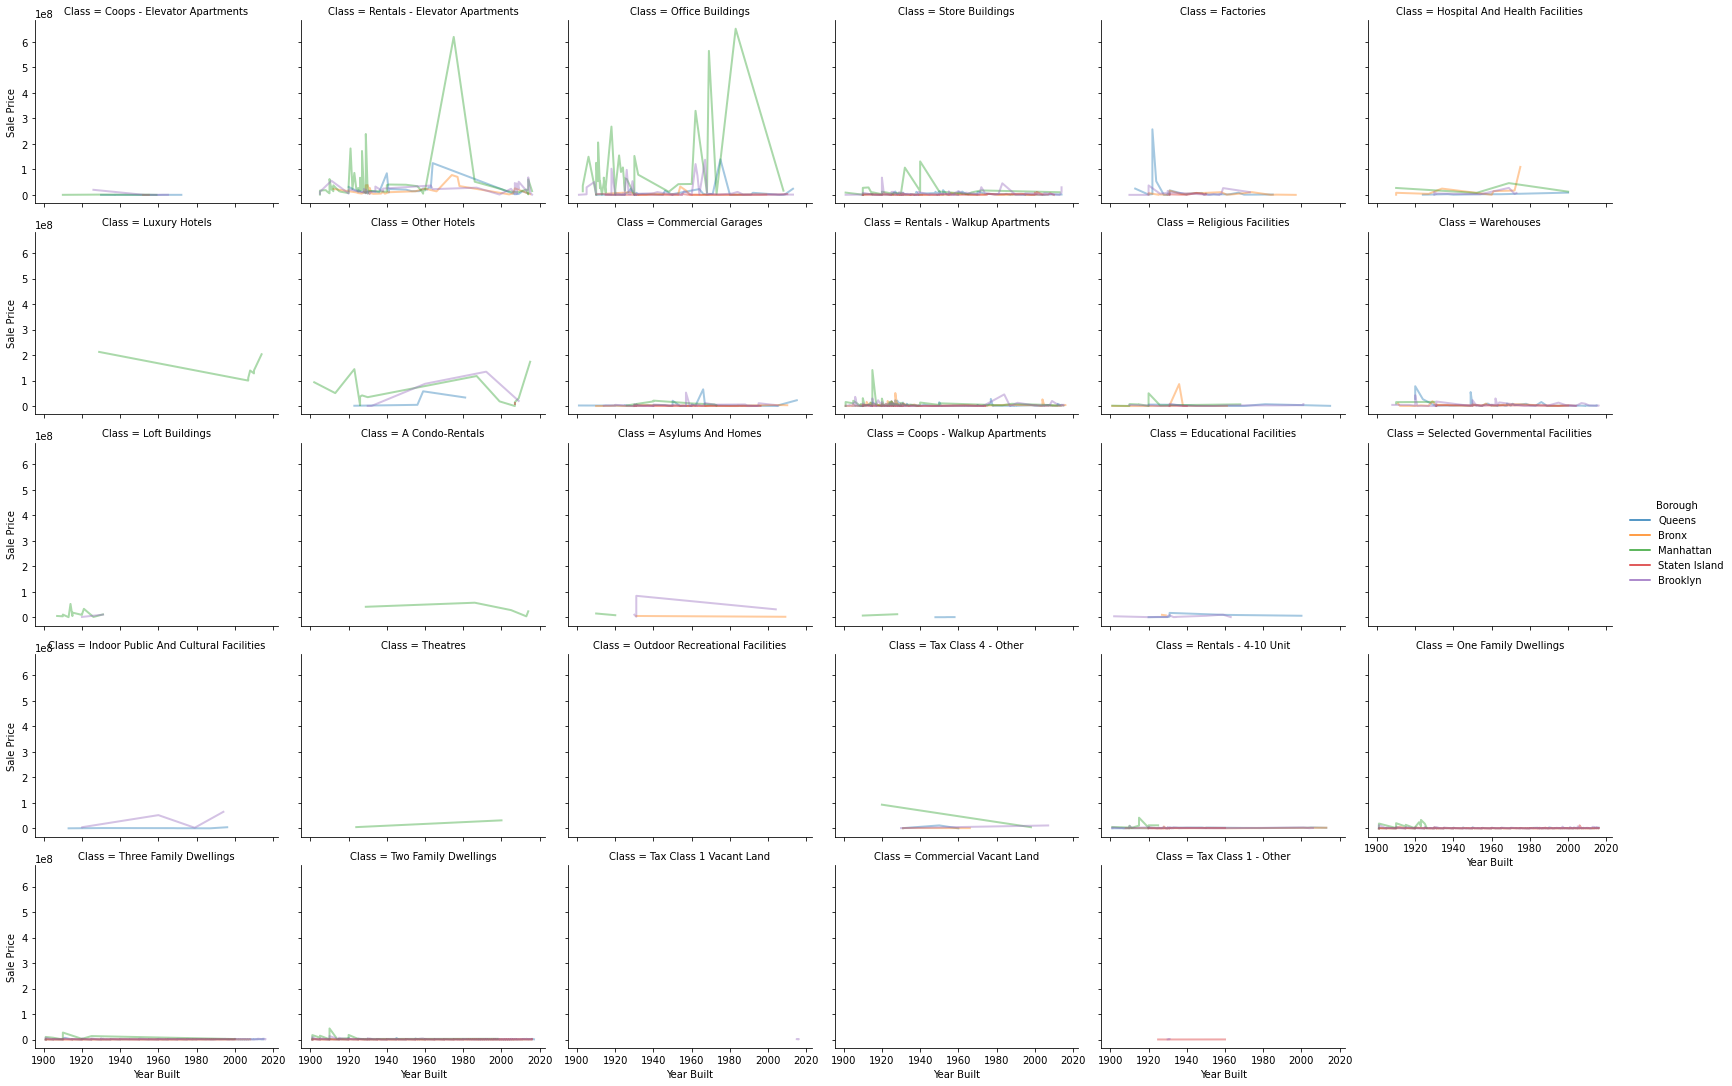

In [75]:
sns.relplot(x="Year Built", y="Sale Price", hue="Borough",
            kind="line", estimator=None, data=k[k['Year Built']>1900],
            sizes='Year Built', col='Class',col_wrap=6,
            height=3, aspect=1.25, linewidth=2,alpha=0.4);

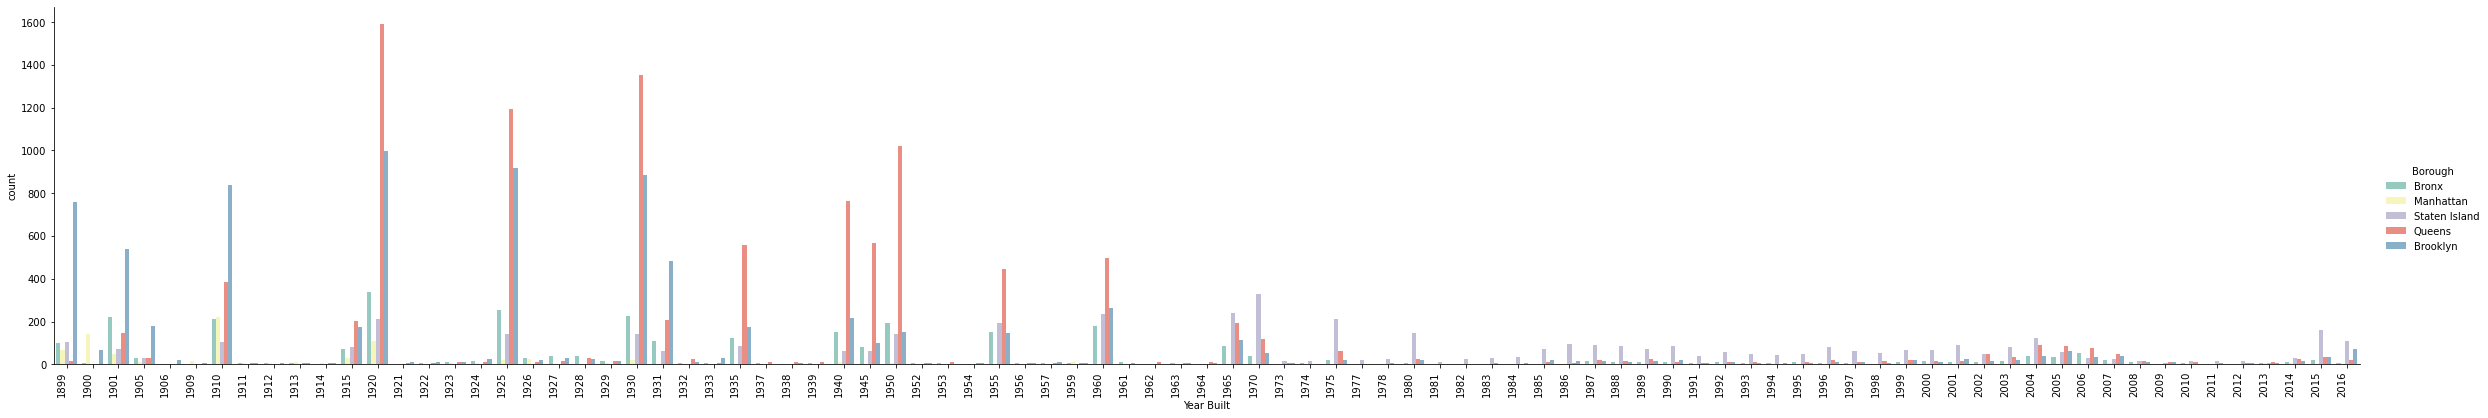

In [68]:
ax = sns.catplot(x="Year Built", hue="Borough",
            data=k[k['Year Built'].map(k['Year Built'].value_counts())>15],kind='count',
            height=5.5,aspect=3/.5,palette="Set3");

ax.set_xticklabels(rotation=90, ha="right")
plt.show()

If we look at the Sale Price by Year Built matrix, we can see that the Manhattan Office Building built in 60-70s, and also 90s, sold at the highest rates. Rental apartments built in Manhattan around the 70s also scored high as far as Sale Prices go.

If we look at the total # of sales regardless of the price however, it turns out that the majority of properties sold in our given time range is comprised of units in Queens built sometime between 1925 and 1960. Let's zoom in and see the class of those buildinds:

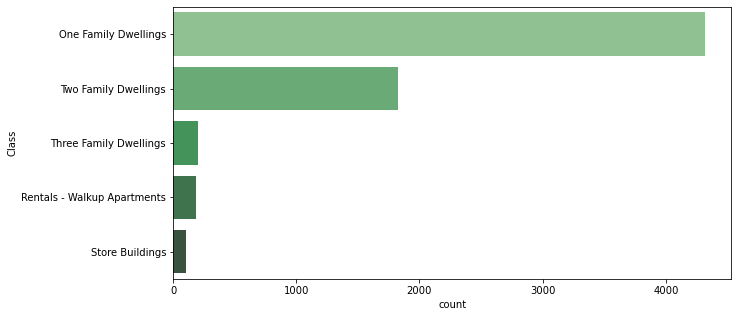

In [69]:
ax = sns.countplot(y="Class",
            data=k[(k['Borough']=='Queens') & 
                   (k['Year Built'].between(1925,1960))],
                   palette="Greens_d",
            order = k['Class'].value_counts().iloc[:5].index);



It appears that the majority of sales that took place in 2016-2017 occurred in Queens and involved 1-3 family dwellings built somewhere betweet 1925 and 1960.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

My multivariate exploration indicated that there indeed is a positive effect of increased units and square footage on the sale price. It showed that while the most expensive sales occurred in Manhattan and involved Hotels and Condo-Rentals, if we look at the quantity the *majority* of sales actually took place in Queens, and they encompasses sales of single family dwellings.

### Were there any interesting or surprising interactions between features?

I was surprised to find out that more modern does not necessarily mean more expensive as far as property sales go (at least based our 2016-2017 dataset). We can see that the most expensive sales involved properties built between 1900 and 1975. 